In [21]:
import nltk
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.neighbors import KNeighborsClassifier

In [22]:
import datetime
import time

In [23]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/jordan/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [24]:
df = pd.read_csv('FakeReviews.csv')

In [25]:
# Feature Engineering:

In [26]:
df['word_count'] = df['text_'].apply(lambda x: len(x.split()))
df['char_count'] = df['text_'].apply(lambda x: len(x))
df['upper_count'] = df['text_'].apply(lambda x: len(re.findall(r'[A-Z]', x)))
df['exclamation_count'] = df['text_'].apply(lambda x: x.count('!'))
df['avg_word_len'] = df['char_count'] / df['word_count']

stopwords = nltk.corpus.stopwords.words('english')
df['stopword_count'] = df['text_'].apply(lambda x: len([word for word in x.split() if word.lower() in stopwords]))


In [27]:
# Outputting and visualising date from Feature Engineering:

Summary Statistics of New Features:
         word_count    char_count   upper_count  exclamation_count  \
count  40432.000000  40432.000000  40432.000000       40432.000000   
mean      67.465423    351.271963      9.782573           0.397532   
std       69.581333    369.813570     15.821904           1.393667   
min        1.000000     24.000000      0.000000           0.000000   
25%       21.000000    107.000000      3.000000           0.000000   
50%       39.000000    198.000000      5.000000           0.000000   
75%       85.000000    439.000000     11.000000           0.000000   
max      373.000000   2827.000000    805.000000         133.000000   

       avg_word_len  stopword_count  
count  40432.000000    40432.000000  
mean       5.198195       34.494757  
std        0.722885       36.009707  
min        3.588235        0.000000  
25%        4.851852       10.000000  
50%        5.125302       20.000000  
75%        5.451369       44.000000  
max       48.000000      209.

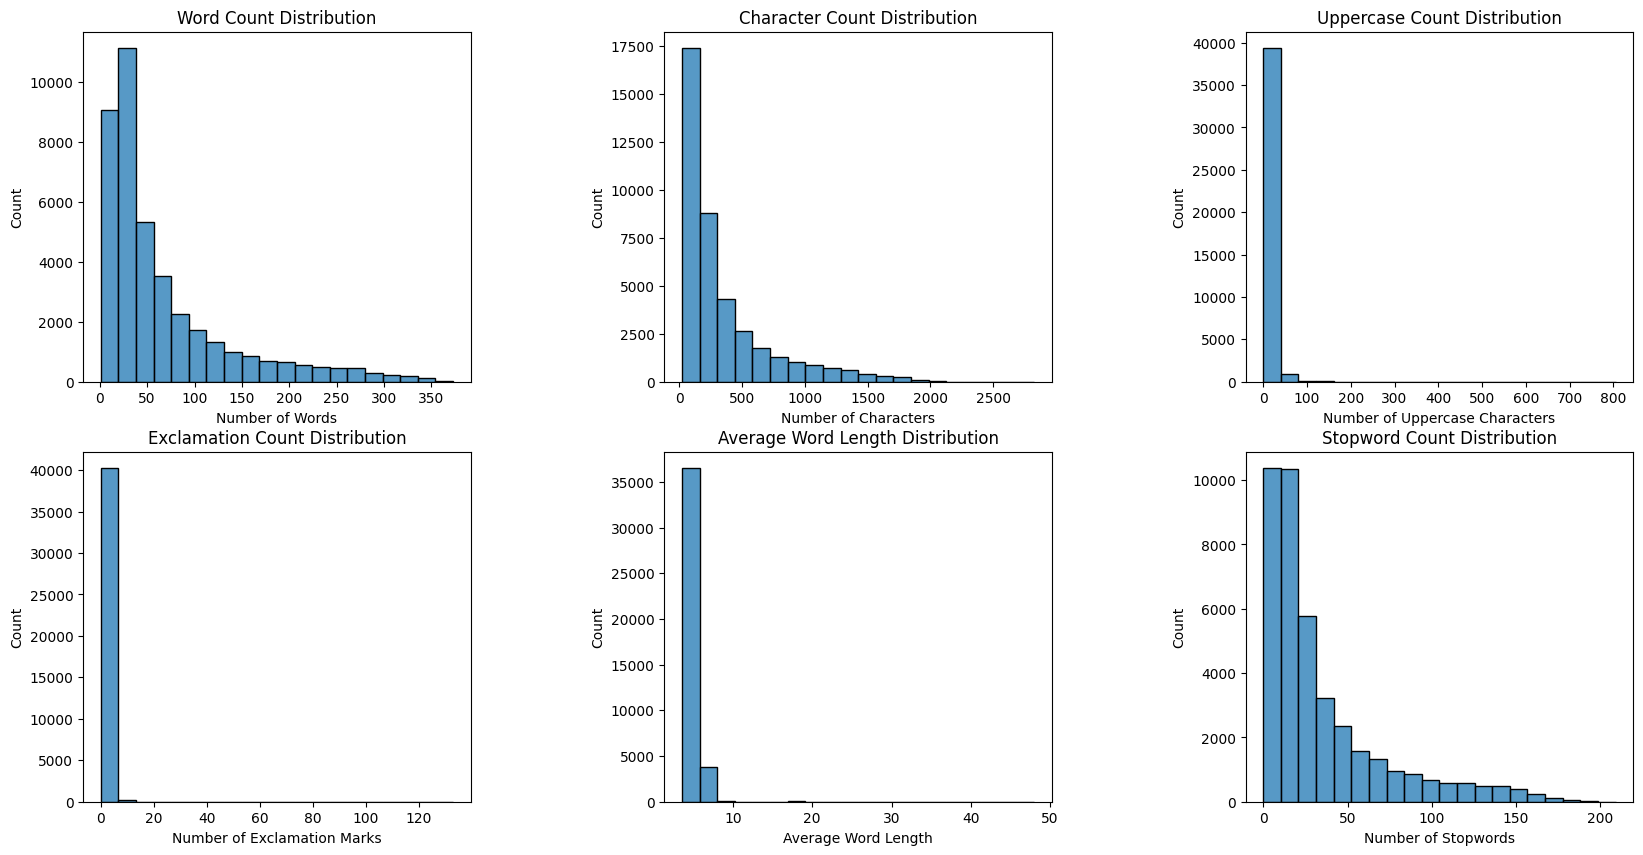

In [28]:
print("Summary Statistics of New Features:")
print(df[['word_count', 'char_count', 'upper_count', 'exclamation_count', 'avg_word_len', 'stopword_count']].describe())

plt.figure(figsize=(20,10))
plt.subplots_adjust(wspace=0.5)
plt.subplot(231)
sns.histplot(df['word_count'], bins=20, kde=False)
plt.title('Word Count Distribution')
plt.xlabel('Number of Words')

plt.subplot(232)
sns.histplot(df['char_count'], bins=20, kde=False)
plt.title('Character Count Distribution')
plt.xlabel('Number of Characters')

plt.subplot(233)
sns.histplot(df['upper_count'], bins=20, kde=False)
plt.title('Uppercase Count Distribution')
plt.xlabel('Number of Uppercase Characters')

plt.subplot(234)
sns.histplot(df['exclamation_count'], bins=20, kde=False)
plt.title('Exclamation Count Distribution')
plt.xlabel('Number of Exclamation Marks')

plt.subplot(235)
sns.histplot(df['avg_word_len'], bins=20, kde=False)
plt.title('Average Word Length Distribution')
plt.xlabel('Average Word Length')

plt.subplot(236)
sns.histplot(df['stopword_count'], bins=20, kde=False)
plt.title('Stopword Count Distribution')
plt.xlabel('Number of Stopwords')

plt.show()


In [29]:
# Sentiment Analysis:

In [30]:
sia = SentimentIntensityAnalyzer()
def get_sentiment_scores(text):
    return sia.polarity_scores(text)

In [31]:
st = time.time()

df['sentiment_scores'] = df['text_'].apply(get_sentiment_scores)
df['sentiment'] = df['sentiment_scores'].apply(lambda x: x['compound'])
df['sentiment_label'] = df['sentiment'].apply(lambda x: 'positive' if x > 0 else 'negative')
et = time.time()
elapsed_time = et - st

print(elapsed_time)

19.934553146362305


In [32]:
# Output of Sentiment Analysis

print(df[['text_', 'sentiment_label']].head())

                                               text_ sentiment_label
0  Love this!  Well made, sturdy, and very comfor...        positive
1  love it, a great upgrade from the original.  I...        positive
2  This pillow saved my back. I love the look and...        positive
3  Missing information on how to use it, but it i...        positive
4  Very nice set. Good quality. We have had the s...        positive


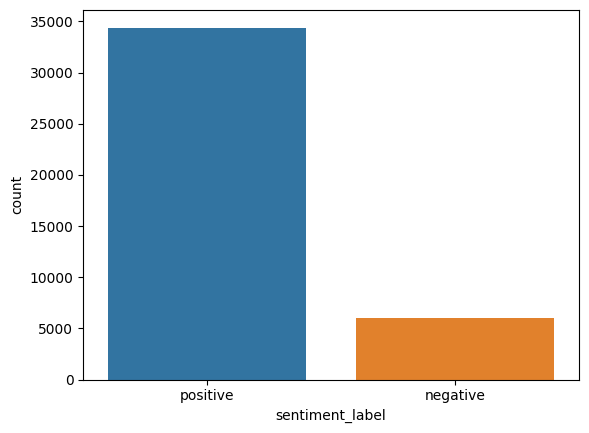

In [33]:
# Bar chart to visualize the distribution of Sentiment Labels


sns.countplot(x='sentiment_label', data=df)
plt.show()

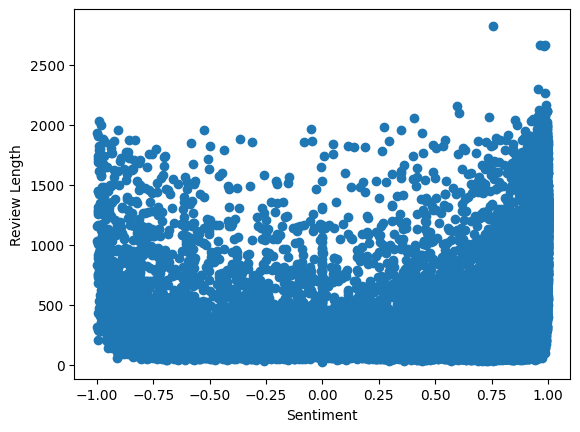

In [34]:
# Scatter plot to visualize the relationship between sentiment and review length


plt.scatter(x=df['sentiment'], y=df['text_'].apply(len))
plt.xlabel('Sentiment')
plt.ylabel('Review Length')
plt.show()

In [35]:
df.to_csv('reviews_sentiment.csv', index=False)

In [36]:
# Training and testing data for classification:

In [37]:
X_train, X_test, y_train, y_test = train_test_split(df['text_'], df['sentiment_label'], test_size=0.2, random_state=42)

In [38]:
count_vect = CountVectorizer()
tfidf_vect = TfidfVectorizer()

In [39]:
X_train_count = count_vect.fit_transform(X_train)
X_train_tfidf = tfidf_vect.fit_transform(X_train)

X_test_count = count_vect.transform(X_test)
X_test_tfidf = tfidf_vect.transform(X_test)

In [40]:
# Using Naive Bayes classification:

nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_count, y_train)
nb_pred = nb_classifier.predict(X_test_count)
nb_accuracy = accuracy_score(y_test, nb_pred)
nb_cm = confusion_matrix(y_test, nb_pred)
print('Naive Bayes accuracy:', nb_accuracy)
print('Naive Bayes confusion matrix:')
print(nb_cm)


# Using Logistic Regression classification:

lr_classifier = LogisticRegression()
lr_classifier.fit(X_train_tfidf, y_train)
lr_pred = lr_classifier.predict(X_test_tfidf)
lr_accuracy = accuracy_score(y_test, lr_pred)
lr_cm = confusion_matrix(y_test, lr_pred)
print('Logistic Regression accuracy:', lr_accuracy)
print('Logistic Regression confusion matrix:')
print(lr_cm)

# Using K-Nearest Neighbors:

knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train_tfidf, y_train)
knn_pred = knn_classifier.predict(X_test_tfidf)
knn_accuracy = accuracy_score(y_test, knn_pred)
knn_cm = confusion_matrix(y_test, knn_pred)
print('KNN accuracy:', knn_accuracy)
print('KNN confusion matrix:')
print(knn_cm)

Naive Bayes accuracy: 0.8579201187090392
Naive Bayes confusion matrix:
[[ 293  907]
 [ 242 6645]]
Logistic Regression accuracy: 0.8922962779770002
Logistic Regression confusion matrix:
[[ 411  789]
 [  82 6805]]
KNN accuracy: 0.8345492766167923
KNN confusion matrix:
[[ 306  894]
 [ 444 6443]]


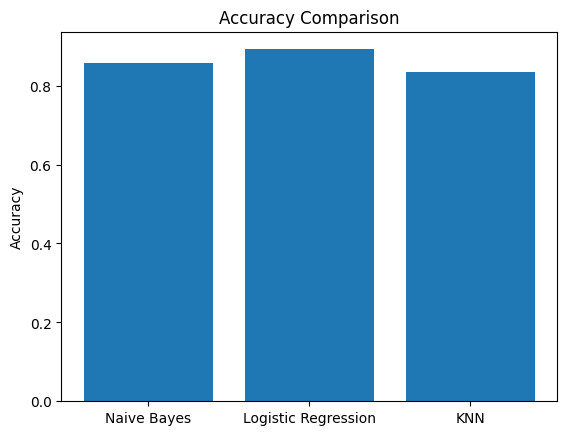

In [41]:
# Comparing accuracy of classifiers:

plt.bar(['Naive Bayes', 'Logistic Regression', 'KNN'], [nb_accuracy, lr_accuracy, knn_accuracy])
plt.title('Accuracy Comparison')
plt.ylabel('Accuracy')
plt.show()